In [2]:
# read in data cubes
from survey_params import *

time_par = TIME_param(survey_shape='slab')

Icmb_cube = np.load('Icube/Icmb_arr.npy')
Icmb_arr = Icmb_cube[:, round(time_par.Nx/2), :]
Icib_cube = np.load('Icube/Icib_arr.npy')
Icib_arr = Icib_cube[:, round(time_par.Nx/2), :]
Iatm_cube = np.load('Icube/Iatm_arr.npy')
Iatm_arr = Iatm_cube[:, round(time_par.Nx/2), :]
In_cube = np.load('Icube/Inoise_arr.npy')
In_arr = In_cube[:, round(time_par.Nx/2), :]

Iline_arr=np.zeros([9, Icmb_arr.shape[0], Icmb_arr.shape[1]])

Icii_cube = np.load('Icube/Icii_arr.npy')
Iline_arr[0,:,:] = Icii_cube[:, round(time_par.Nx/2), :]

Icosum_cube = 0
for jco in range(3,9,1):
    Ico_cube = np.load('Icube/Ico' + str(jco) + '_arr.npy')
    Icosum_cube += Ico_cube
    Iline_arr[jco,:,:] = Ico_cube[:, round(time_par.Nx/2), :]
    
Iline_sum_arr = np.sum(Iline_arr,axis=0)

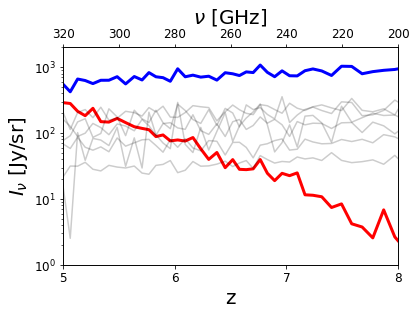

In [146]:
z_bins = 1902/time_par.nu_bins - 1
fig, ax = plt.subplots(1,1)
ax.semilogy(z_bins,np.mean(Icii_cube.reshape(180**2,-1),axis=0),'r',lw=3)
ax.semilogy(z_bins,np.mean(Icosum_cube.reshape(180**2,-1),axis=0),lw=3,c='b')
for jco in range(3,9,1):
    Ico_cube = np.load('Icube/Ico' + str(jco) + '_arr.npy')
    ax.plot(z_bins,np.mean(Ico_cube.reshape(180**2,-1),axis=0),c='k',alpha=0.2)
ax.set_xlim([5,8])
ax.set_ylim([1e0,2e3])
ax.set_xlabel('z',fontsize=20)
ax.set_ylabel(r'$I_\nu$ [Jy/sr]',fontsize=20)
ax.set_xticks([5,6,7,8])
ax.tick_params(labelsize=12)

ax1 = ax.twiny()
ax1.set_xlim([1902/6,1902/9])
nu_print = np.arange(200,340,20)[::-1]
ax1.set_xticks(nu_print)
ax1.tick_params(labelsize=12)
ax1.set_xlabel(r'$\nu$ [GHz]',fontsize=20)
plt.savefig('/Users/ytcheng/Desktop/LIM_spec.png', dpi = 300, bbox_inches='tight')

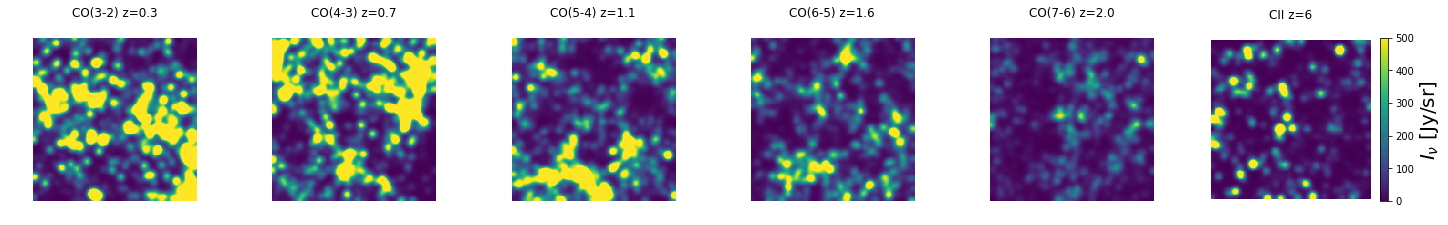

In [145]:
from scipy.ndimage import gaussian_filter

fig, ax = plt.subplots(1,6,figsize=(25,3))
im=ax[-1].imshow(gaussian_filter(Icii_cube[:,:,17], sigma=3),vmin=0,vmax=500)
ax[-1].set_title('CII z=6\n')
ax[-1].axis('off')
for jco in range(3,8,1):
    zco = 115.3*jco/time_par.nu_bins[17] - 1
    Ico_cube = np.load('Icube/Ico' + str(jco) + '_arr.npy')
    ax[jco-3].imshow(gaussian_filter(Ico_cube[:,:,17], sigma=3),vmin=0,vmax=500)
    ax[jco-3].axis('off')
    ax[jco-3].set_title('CO(%d-%d) z=%.1f\n'%(jco,jco-1,zco))
cbar=fig.colorbar(im)
cbar.set_label(r'$I_\nu$ [Jy/sr]',fontsize=20)
plt.savefig('/Users/ytcheng/Desktop/LIM_im.png', dpi = 150, bbox_inches='tight')